### モジュールのインポート

In [1]:
import numpy as np
import pickle
import MeCab
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### サンプルデータの読み込み

In [2]:
with open('Sample_Data.pickle','rb') as f:
    labels,texts = pickle.load(f)

### 形態素解析の辞書，word2vecモデルの読み込み

In [3]:
#辞書
dic_path="dic/mecab-ipadic-neologd-0.0.5"
tagger = MeCab.Tagger("-Ochasen -d {0}".format(dic_path))
# word2vecのモデル
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('word2vec/entity_vector.model.txt')

### CNNによる学習

In [4]:
import CNN_text
CNN_classifier = CNN_text.CNN(tagger=tagger,model=model,filter_sizes=[3,4,5],n_epochs=100)

Using TensorFlow backend.


In [5]:
CNN_classifier.fit(labels=labels,texts=texts)

学習開始
EPOCH:1
 epoch 20, loss 3.65392, acc 0.275
EPOCH:2
 epoch 40, loss 2.78577, acc 0.3275
EPOCH:3
 epoch 60, loss 2.52728, acc 0.3295
EPOCH:4
 epoch 80, loss 2.42647, acc 0.3285
EPOCH:5
 epoch 100, loss 2.11737, acc 0.3585
EPOCH:6
 epoch 120, loss 2.23207, acc 0.325
EPOCH:7
 epoch 140, loss 1.91391, acc 0.355
EPOCH:8
 epoch 160, loss 1.92518, acc 0.36
EPOCH:9
 epoch 180, loss 1.82562, acc 0.3465
EPOCH:10
 epoch 200, loss 1.6945, acc 0.3645
EPOCH:11
 epoch 220, loss 1.68187, acc 0.3605
EPOCH:12
 epoch 240, loss 1.70166, acc 0.356
EPOCH:13


KeyboardInterrupt: 

### 正解率とConfusionMatrix

正解率：0.3644999861717224


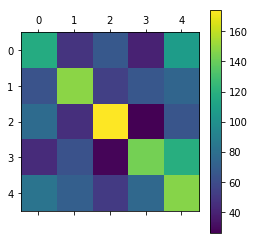

In [6]:
Results = CNN_classifier.Results

print('正解率：{}'.format(max(Results['Accuracy'].values)))
CMX = pd.DataFrame(Results.loc[Results['Accuracy'].argmax(),'confusion_matrix'])
plt.matshow(CMX)
plt.colorbar()

### 学習したモデルを用いてラベル未知のユーザの推定

In [7]:
predictions, probabilities = CNN_classifier.predict(texts=texts[:10])

In [8]:
predictions

array([4, 0, 0, 4, 0, 0, 4, 2, 0, 2])

In [9]:
probabilities

array([[ 0.18821357,  0.29649419,  0.10976574,  0.02096168,  0.38456479],
       [ 0.3626807 ,  0.06034084,  0.08000908,  0.20400453,  0.29296482],
       [ 0.64565641,  0.005671  ,  0.02862941,  0.00699069,  0.31305248],
       [ 0.32183924,  0.04808598,  0.0308047 ,  0.21395493,  0.38531515],
       [ 0.40559125,  0.08727788,  0.33987889,  0.02253078,  0.1447212 ],
       [ 0.40020779,  0.01095043,  0.17327569,  0.04481718,  0.37074894],
       [ 0.31996909,  0.12788494,  0.17887409,  0.03172331,  0.34154853],
       [ 0.33823234,  0.00712198,  0.37533751,  0.0321864 ,  0.2471218 ],
       [ 0.40865371,  0.04201913,  0.35868132,  0.03477749,  0.15586832],
       [ 0.32001221,  0.0958419 ,  0.39063308,  0.06931584,  0.12419709]], dtype=float32)

### 最も loss が小さかったモデルの復元

In [10]:
import tensorflow as tf
saver = tf.train.Saver()
Best_sess = tf.InteractiveSession()
saver.restore(Best_sess, "model/Best_model.ckpt")

INFO:tensorflow:Restoring parameters from model/Best_model.ckpt
